In [ ]:
!pip install -q tflite-model-maker
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker

!pip install -q pycocotools
!pip install -q tflite-support
!pip install -q tflite-model-maker


     |████████████████████████████████| 616 kB 5.4 MB/s 
     |████████████████████████████████| 840 kB 36.2 MB/s 
     |████████████████████████████████| 87 kB 5.7 MB/s 
     |████████████████████████████████| 596 kB 35.5 MB/s 
     |████████████████████████████████| 1.2 MB 35.9 MB/s 
     |████████████████████████████████| 77 kB 4.9 MB/s 
     |████████████████████████████████| 237 kB 44.4 MB/s 
     |████████████████████████████████| 1.1 MB 39.8 MB/s 
     |████████████████████████████████| 120 kB 42.7 MB/s 
     |████████████████████████████████| 3.4 MB 30.9 MB/s 
     |████████████████████████████████| 6.4 MB 32.1 MB/s 
     |████████████████████████████████| 1.1 MB 40.9 MB/s 
     |████████████████████████████████| 25.3 MB 44.9 MB/s 
     |████████████████████████████████| 352 kB 44.0 MB/s 
     |████████████████████████████████| 99 kB 8.7 MB/s 
     |████████████████████████████████| 47.8 MB 67 kB/s 
     |████████████████████████████████| 462 kB 43.8 MB/s 
     |███████████████

In [ ]:
import numpy as np
import os
import glob
import PIL.Image

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/dataset/indianfoodimages.zip

Archive:  gdrive/My Drive/dataset/indianfoodimages.zip
   creating: indianfoodimages/test/
   creating: indianfoodimages/test/annotations/
  inflating: indianfoodimages/test/annotations/001.xml  
  inflating: indianfoodimages/test/annotations/002.xml  
  inflating: indianfoodimages/test/annotations/002c57eb72.xml  
  inflating: indianfoodimages/test/annotations/003.xml  
  inflating: indianfoodimages/test/annotations/004.xml  
  inflating: indianfoodimages/test/annotations/005.xml  
  inflating: indianfoodimages/test/annotations/006.xml  
  inflating: indianfoodimages/test/annotations/007.xml  
  inflating: indianfoodimages/test/annotations/008.xml  
  inflating: indianfoodimages/test/annotations/009.xml  
  inflating: indianfoodimages/test/annotations/00a258a357.xml  
  inflating: indianfoodimages/test/annotations/00cf330f1d.xml  
  inflating: indianfoodimages/test/annotations/00d4263b19.xml  
  inflating: indianfoodimages/test/annotations/00df26e2ac.xml  
  inflating: indianfoodimage

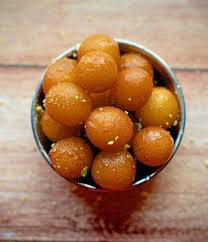

In [ ]:
import PIL # We will import the packages at "use-time (just for this kernel)

PIL.Image.open("/content/indianfoodimages/train/images/3bdd77d45e.jpg")


In [ ]:
spec = model_spec.get('efficientdet_lite0')

In [ ]:
train_data = object_detector.DataLoader.from_pascal_voc("/content/indianfoodimages/train/images", "/content/indianfoodimages/train/annotations",  ['adhirasam','aloo_gobi','aloo_matar','aloo_methi','aloo_shimla_mirch','aloo_tikki',
                                                                                                       'anarsa','ariselu','bandar_laddu','basundi','biryani','boondi','butter_chicken',
                                                                                                       'chak_hao_kheer','cham_cham','chana masala','chapati','chicken_razala','chicken_tikka','chikki',
                                                                                                      'carrot halwa','gulab jamun','jalebi','bindi masala','kajjikaya','kuzhi paniyaram',
                                                                                                       'lassi','modak','mysore pak','naan','palak paneer','paneer butter masala','poha','rasagulla',
                                                                                                       'poori','channa masala','dosa','sambar','coconut chutney','dal makhani','dhokla','fried rice',
                                                                                                       'idly','kulfi','pakoda','tomato sauce','samosa','sutar_feni','unni_appam','rice','dal','tandoori chicken',
                                                                                                       'meduvadai','noodles','chapathi','ldly','chutney','green chutney','chana_masala','mayonnaise','kurma'])
                                                                                                  

In [ ]:
validation_data = object_detector.DataLoader.from_pascal_voc('/content/indianfoodimages/test/images', '/content/indianfoodimages/test/annotations', ['adhirasam','aloo_gobi','aloo_matar','aloo_methi','aloo_shimla_mirch','aloo_tikki',
                                                                                                       'anarsa','ariselu','bandar_laddu','basundi','biryani','boondi','butter_chicken',
                                                                                                       'chak_hao_kheer','cham_cham','chana masala','chapati','chicken_razala','chicken_tikka','chikki',
                                                                                                      'carrot halwa','gulab jamun','jalebi','bindi masala','kajjikaya','kuzhi paniyaram',
                                                                                                       'lassi','modak','mysore pak','naan','palak paneer','paneer butter masala','poha','rasagulla',
                                                                                                       'poori','channa masala','dosa','sambar','coconut chutney','dal makhani','dhokla','fried rice',
                                                                                                       'idly','kulfi','pakoda','tomato sauce','samosa','sutar_feni','unni_appam','rice','dal','tandoori chicken',
                                                                                                       'meduvadai','noodles','chapathi','ldly','chutney','green chutney','chana_masala','mayonnaise','kurma'])

In [ ]:
model = object_detector.create(train_data, model_spec=spec,batch_size=16, train_whole_model=True, validation_data=validation_data)

Epoch 1/50
93/93 [==============================] - 184s 1s/step - det_loss: 1.9122 - cls_loss: 1.4476 - box_loss: 0.0093 - reg_l2_loss: 0.0735 - loss: 1.9857 - learning_rate: 0.0140 - gradient_norm: 1.0497 - val_det_loss: 1.8778 - val_cls_loss: 1.4892 - val_box_loss: 0.0078 - val_reg_l2_loss: 0.0735 - val_loss: 1.9513
Epoch 2/50
93/93 [==============================] - 127s 1s/step - det_loss: 1.6484 - cls_loss: 1.3720 - box_loss: 0.0055 - reg_l2_loss: 0.0735 - loss: 1.7219 - learning_rate: 0.0200 - gradient_norm: 1.5064 - val_det_loss: 1.7791 - val_cls_loss: 1.4393 - val_box_loss: 0.0068 - val_reg_l2_loss: 0.0735 - val_loss: 1.8527
Epoch 3/50
93/93 [==============================] - 125s 1s/step - det_loss: 1.4724 - cls_loss: 1.2367 - box_loss: 0.0047 - reg_l2_loss: 0.0736 - loss: 1.5460 - learning_rate: 0.0199 - gradient_norm: 1.6053 - val_det_loss: 1.6263 - val_cls_loss: 1.3310 - val_box_loss: 0.0059 - val_reg_l2_loss: 0.0736 - val_loss: 1.6999
Epoch 4/50
93/93 [===================

In [ ]:
model.evaluate(validation_data)

14/14 [==============================] - 249s 9s/step



{'AP': 0.32874656,
 'AP50': 0.5010389,
 'AP75': 0.37329814,
 'AP_/adhirasam': 0.27529913,
 'AP_/aloo_gobi': 0.10539171,
 'AP_/aloo_matar': 0.048283864,
 'AP_/aloo_methi': 0.028462077,
 'AP_/aloo_shimla_mirch': 0.19166869,
 'AP_/aloo_tikki': 0.1749791,
 'AP_/anarsa': -1.0,
 'AP_/ariselu': -1.0,
 'AP_/bandar_laddu': 0.42300883,
 'AP_/basundi': 0.47835374,
 'AP_/bindi masala': -1.0,
 'AP_/biryani': 0.18250391,
 'AP_/boondi': 0.31465468,
 'AP_/butter_chicken': 0.1855724,
 'AP_/carrot halwa': 0.44711038,
 'AP_/chak_hao_kheer': 0.439024,
 'AP_/cham_cham': 0.028625563,
 'AP_/chana masala': -1.0,
 'AP_/chana_masala': 0.25849006,
 'AP_/channa masala': 0.47981644,
 'AP_/chapathi': 0.0,
 'AP_/chapati': 0.22448538,
 'AP_/chicken_razala': 0.37190196,
 'AP_/chicken_tikka': 0.20396134,
 'AP_/chikki': 0.3323177,
 'AP_/chutney': -1.0,
 'AP_/coconut chutney': 0.5008868,
 'AP_/dal': 0.0,
 'AP_/dal makhani': 0.7124365,
 'AP_/dhokla': 0.55367863,
 'AP_/dosa': 0.5602389,
 'AP_/fried rice': 0.6823192,
 'AP_/

In [ ]:
model.export(export_dir='.')

In [ ]:
model.evaluate_tflite('model.tflite',  validation_data)

864/864 [==============================] - 2503s 3s/step



{'AP': 0.30339494,
 'AP50': 0.45732814,
 'AP75': 0.34611547,
 'AP_/adhirasam': 0.28640285,
 'AP_/aloo_gobi': 0.11364912,
 'AP_/aloo_matar': 0.013452183,
 'AP_/aloo_methi': 0.02728552,
 'AP_/aloo_shimla_mirch': 0.19228809,
 'AP_/aloo_tikki': 0.16921493,
 'AP_/anarsa': -1.0,
 'AP_/ariselu': -1.0,
 'AP_/bandar_laddu': 0.36673415,
 'AP_/basundi': 0.434874,
 'AP_/bindi masala': -1.0,
 'AP_/biryani': 0.091241434,
 'AP_/boondi': 0.24277472,
 'AP_/butter_chicken': 0.09089524,
 'AP_/carrot halwa': 0.4116876,
 'AP_/chak_hao_kheer': 0.40737465,
 'AP_/cham_cham': 0.023827856,
 'AP_/chana masala': -1.0,
 'AP_/chana_masala': 0.12195538,
 'AP_/channa masala': 0.46908963,
 'AP_/chapathi': 0.0,
 'AP_/chapati': 0.24907845,
 'AP_/chicken_razala': 0.28574598,
 'AP_/chicken_tikka': 0.1853715,
 'AP_/chikki': 0.32685447,
 'AP_/chutney': -1.0,
 'AP_/coconut chutney': 0.49967152,
 'AP_/dal': 0.0,
 'AP_/dal makhani': 0.6501261,
 'AP_/dhokla': 0.5537924,
 'AP_/dosa': 0.54510885,
 'AP_/fried rice': 0.6382071,
 'A